In [87]:
# Importing dependencies
from datetime import datetime
now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))
import os
import pip
import numpy as np
os.system('python3 -m pip install numpy')
os.system('python3 -m pip install matplotlib')
os.system('python3 -m pip install scipy')
os.system('python3 -m pip install panda')
os.system('python3 -m pip install nilearn')
os.system('python3 -m pip install pickle')
os.system('python3 -m pip install atlasreader')
import matplotlib.pyplot as plt

%matplotlib inline

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Starting cell: 18:14:27
Finishing cell: 18:14:39


#### Loading files and GLMs

In [88]:
def list_files(startpath):
    """ Simple function to show directory tree. 
    From: https://stackoverflow.com/questions/9727673/list-directory-tree-structure-in-python. """
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        #print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in sorted(files):
            print()
            #print('{}{}'.format(subindent, f))
            
data_dir='/work/82777/BIDS/' 
derivatives_dir=  '/work/82777/BIDS/derivatives/'          
list_files(derivatives_dir)

In [89]:
from nilearn.glm.first_level import first_level_from_bids

#BIDS directory
data_dir='/work/82777/BIDS/'
# BIDS derivatives (contains preprocessed data)
derivatives_dir='/work/82777/BIDS/derivatives' 
# Name for experiment in the BIDS directory
task_label = 'EPIsequencewords'
# Label for data that are spatially aligned to the MNI152 template (i.e. spatially normalised)
space_label ='MNI152NLin2009cAsym'
#Run the function that can gather all the needed info from a BIDS folder
models, models_run_imgs, models_events, models_confounds = \
    first_level_from_bids(
        data_dir, task_label, derivatives_folder=derivatives_dir, n_jobs=6, verbose=1,
        img_filters=[('desc', 'preproc')])

#Print the data from the first participant as sanity check
print(models_run_imgs[0])

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

/opt/conda/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:940: UserWarning: SliceTimingRef not found in file /work/82777/BIDS/derivatives/sub-0054/func/sub-0054_task-EPIsequencewords_run-1_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.json. It will be assumed that the slice timing reference is 0.0 percent of the repetition time. If it is not the case it will need to be set manually in the generated list of models
  warn('SliceTimingRef not found in file %s. It will be assumed'


['/work/82777/BIDS/derivatives/sub-0054/func/sub-0054_task-EPIsequencewords_run-1_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '/work/82777/BIDS/derivatives/sub-0054/func/sub-0054_task-EPIsequencewords_run-2_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '/work/82777/BIDS/derivatives/sub-0054/func/sub-0054_task-EPIsequencewords_run-3_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '/work/82777/BIDS/derivatives/sub-0054/func/sub-0054_task-EPIsequencewords_run-4_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '/work/82777/BIDS/derivatives/sub-0054/func/sub-0054_task-EPIsequencewords_run-5_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '/work/82777/BIDS/derivatives/sub-0054/func/sub-0054_task-EPIsequencewords_run-6_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz']
Finishing cell: 18:14:48


In [90]:
#What does the `first_level_from_bid` function take as arguments?
import inspect
import pandas as pd
#Get the argument from the function
args=inspect.getfullargspec(first_level_from_bids)

#Make a dataframe to display arguments (skip the first two ('dataset_path' and 'task_label') that have no defaults
df = pd.DataFrame(args.defaults,args.args[2:])
print(df)

#Same info can also be obtained by writing first_level_from_bids?

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

                                        0
space_label                          None
img_filters                          None
t_r                                  None
slice_time_ref                        0.0
hrf_model                          glover
drift_model                        cosine
high_pass                            0.01
drift_order                             1
fir_delays                            [0]
min_onset                             -24
mask_img                             None
target_affine                        None
target_shape                         None
smoothing_fwhm                       None
memory              Memory(location=None)
memory_level                            1
standardize                         False
signal_scaling                          0
noise_model                           ar1
verbose                                 0
n_jobs                                  1
minimize_memory                      True
derivatives_folder            deri

In [91]:
import os
#Get the file names for subj01 functional data
func01=([os.path.basename(run) for run in models_run_imgs[12]])
print(func01)

['sub-0080_task-EPIsequencewords_run-1_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 'sub-0080_task-EPIsequencewords_run-2_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 'sub-0080_task-EPIsequencewords_run-3_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 'sub-0080_task-EPIsequencewords_run-4_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 'sub-0080_task-EPIsequencewords_run-5_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 'sub-0080_task-EPIsequencewords_run-6_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz']


In [92]:
from nilearn import image

#Get the full path
func01_path=([os.path.abspath(run) for run in models_run_imgs[0]])
#Load the image and inspect data size
func_img = image.load_img(func01_path)
print("Shape of functional MRI image: %s" % (func_img.shape,))

Shape of functional MRI image: (78, 92, 65, 3600)


In [93]:
confound_friston24 = ['trans_x','trans_y','trans_z',
                 'rot_x','rot_y','rot_z','trans_x_derivative1','trans_y_derivative1','trans_z_derivative1',
                 'rot_x_derivative1','rot_y_derivative1','rot_z_derivative1','trans_x_power2','trans_y_power2','trans_z_power2',
                 'rot_x_power2','rot_y_power2','rot_z_power2']
# The above has to do with movements, their derivatives and their slopes

confound_friston24_GSR = ['global_signal','global_signal_derivative1','global_signal_power2','global_signal_derivative1_power2','trans_x','trans_y','trans_z',
                 'rot_x','rot_y','rot_z','trans_x_derivative1','trans_y_derivative1','trans_z_derivative1',
                 'rot_x_derivative1','rot_y_derivative1','rot_z_derivative1','trans_x_power2','trans_y_power2','trans_z_power2',
                 'rot_x_power2','rot_y_power2','rot_z_power2']

# Subset confounds with selection
# remember that we fit one model for each participant
for ii in range(len(models_confounds)):
    confounds1=models_confounds[ii][:].copy()
    for i in range(len(confounds1)):
        confounds2=confounds1[i].copy()
        confounds2=confounds2[confound_friston24_GSR]
        #Removing NAs in the first row.
        confounds2.loc[0,:]=confounds2.loc[1,:]
        confounds1[i]=confounds2
    models_confounds[ii][:]=confounds1


#Print new confounds, for first participant, first run
print(models_confounds[0][0].columns)

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Index(['global_signal', 'global_signal_derivative1', 'global_signal_power2',
       'global_signal_derivative1_power2', 'trans_x', 'trans_y', 'trans_z',
       'rot_x', 'rot_y', 'rot_z', 'trans_x_derivative1', 'trans_y_derivative1',
       'trans_z_derivative1', 'rot_x_derivative1', 'rot_y_derivative1',
       'rot_z_derivative1', 'trans_x_power2', 'trans_y_power2',
       'trans_z_power2', 'rot_x_power2', 'rot_y_power2', 'rot_z_power2'],
      dtype='object')
Finishing cell: 18:15:50


#### Coding the log-file to match hypothesis

In [95]:
#### Coding the log-file

# loading the events file for each run
n_subs = 22 
n_runs = 6
words = ["beer", "bread", "cheese", "chocolate", "coffee", "gum", "honey", "jam", "lemonade", "medicine", "pie", "rum", "spaghetti", "tea", "tobacco"]
idxs = []
inc = 0
subject_numbers = ['0054', '0057', '0058', '0059','0060', '0062', '0064', '0065', '0066', '0077', '0078', '0079', '0080', '0081','0083', '0084', '0090', '0091','0092','0093','0094','0096']
sub_indexes = []

# creating list of lists of event indices
for i in range(n_subs):
    for j in range(n_runs):
        data=pd.read_csv(f'/work/82777/BIDS/sub-{subject_numbers[j]}/func/sub-{subject_numbers[j]}_task-EPIsequencewords_run-{j+1}_events.tsv',sep='\t') # change the path when changing subject
        idxs.append(list(data[data['word'].isin(words)].index + inc))
        inc += 120
    index_list = [idx for sublist in idxs for idx in sublist]
    sub_indexes.append(index_list)

len(sub_indexes)


22

In [96]:
# Changing condition labels
# creating nested lists for all 6 runs
conditions_label_subjects = []

for i in range(n_subs):
    conditions_label_session = []
    for j in range(len(models_events[0])):
        conditions_label = []
        for k in range(models_events[0][j].shape[0]): 
            if k in index_list:
                conditions_label.append('Food')
            else:
                conditions_label.append('Random')
        conditions_label_session.append(pd.Series(conditions_label, name = 'conditions'))
    conditions_label_subjects.append(conditions_label_session)
    

#conditions_label = np.array(conditions_label)

In [98]:
for i in range(n_subs):
    for j in range(n_runs): # loop through the 6 sessions
        if i == 17 and j == 5:
            pass
        else:
            models_events[i][j] = models_events[i][j].join(conditions_label_subjects[i][j])
            models_events[i][j] = models_events[i][j].drop(columns=["trial_type"])
            models_events[i][j] = models_events[i][j].rename(columns={"conditions": "trial_type"})

In [99]:
#Print model confounds for first participant, first run
print(models_events[0][0].columns)

events_sub= ['onset','duration','trial_type']



# Subset confounds with selection
for ii in range(len(models_events)):
    events1=models_events[ii][:]
    for i in range(len(events1)):
        events2=events1[i]
        events2=events2[events_sub]
        events1[i]=events2
    models_events[ii][:]=events1


#Print new confounds, for first participant, first run
print(models_events[0][0].columns)

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Index(['onset', 'duration', 'response_time', 'word', 'gender', 'age', 'sub',
       'task', 'run', 'year', 'month', 'day', 'hour', 'minute', 'trial_type'],
      dtype='object')
Index(['onset', 'duration', 'trial_type'], dtype='object')
Finishing cell: 18:15:50


#### Single subject analysis (first level analysis)

check how many trials in each condition

In [100]:
participant_number = 19
print(models_events[participant_number][0]['trial_type'].value_counts())

Random    114
Food        6
Name: trial_type, dtype: int64


In [101]:
# Get data and model info for 1st participant
model1=models[participant_number]
imgs1=models_run_imgs[participant_number]
events1=models_events[participant_number]
confounds1=models_confounds[participant_number]

#Fit the model
model1.fit(imgs1,events1,confounds1)
model1.zmap=model1.compute_contrast('Food-Random')

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Computing run 1 out of 6 runs (go take a coffee, a big one)
Computing run 2 out of 6 runs (94 seconds remaining)
/opt/conda/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:64: UserWarning: Mean values of 0 observed.The data have probably been centered.Scaling might not work as expected
  warn('Mean values of 0 observed.'
Computing run 3 out of 6 runs (71 seconds remaining)
/opt/conda/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:64: UserWarning: Mean values of 0 observed.The data have probably been centered.Scaling might not work as expected
  warn('Mean values of 0 observed.'
Computing run 4 out of 6 runs (52 seconds remaining)
/opt/conda/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:64: UserWarning: Mean values of 0 observed.The data have probably been centered.Scaling might not work as expected
  warn('Mean values of 0 observed.'
Computing run 5 out of 6 runs (34 seconds remaining)
/opt/conda/lib/python3.9/site-packages/ni

Finishing cell: 18:17:41


Plotting the design matrix

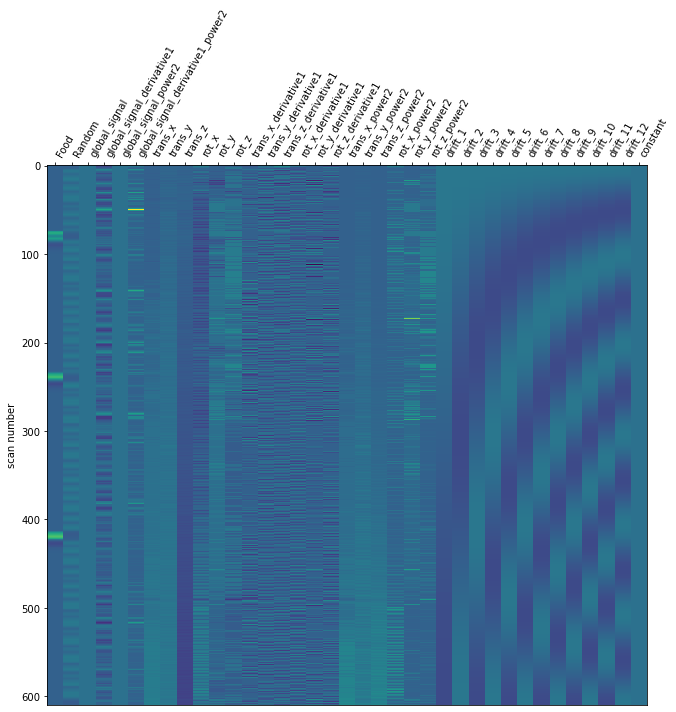

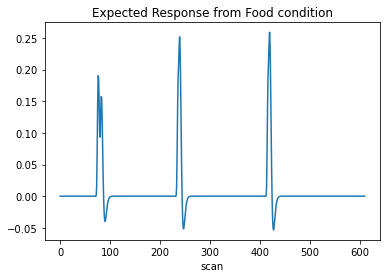

Finishing cell: 20:25:29


In [120]:
from nilearn.plotting import plot_design_matrix

# View the design matrix
design_matrix = model1.design_matrices_[0]


#Plot the design matrix
plot_design_matrix(design_matrix)
plt.savefig('/work/MR Tutorial - Kathrine/MR_tutorials/design_matrix_food_random.png')
plt.show()

# Also plot time series
plt.plot(design_matrix['Food'])
plt.xlabel('scan')
plt.title('Expected Response from Food condition')
plt.savefig('/work/MR Tutorial - Kathrine/MR_tutorials/hrf_food.png')
plt.show()

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Defining the contrasts

Finishing cell: 18:17:42


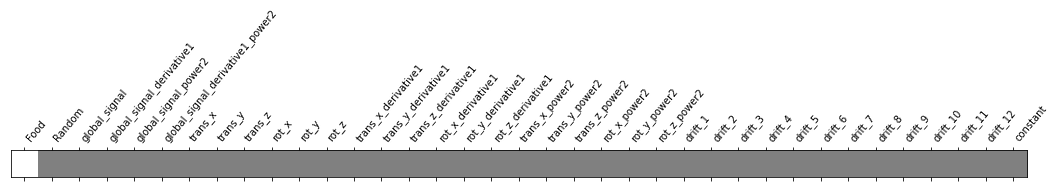

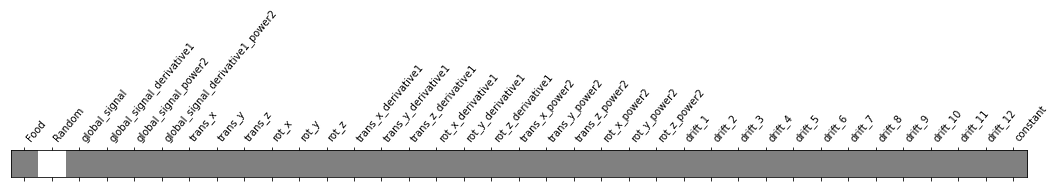

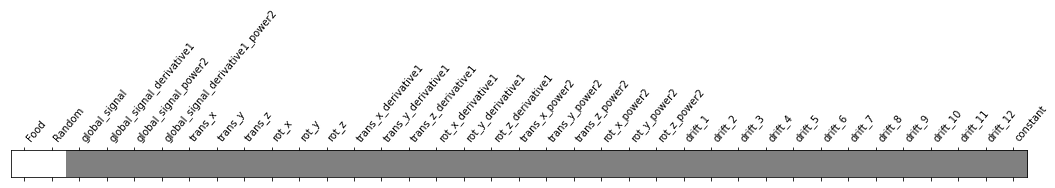

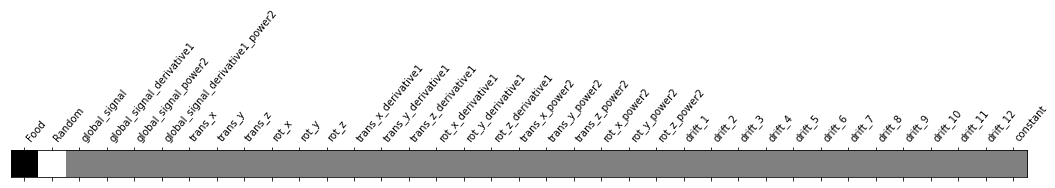

In [104]:
from nilearn.plotting import plot_contrast_matrix

#Define contrasts
contrasts=['Food','Random','Food+Random','Random-Food']

# Plot them to see what they look like
for contrast in contrasts:
    plot_contrast_matrix(contrast, design_matrix=design_matrix)
    
now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Setting the significant threshold

In [105]:
from scipy.stats import norm
p001_unc = norm.isf(0.001)

Plotting the results

/opt/conda/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:696: UserWarning: One contrast given, assuming it for all 6 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)


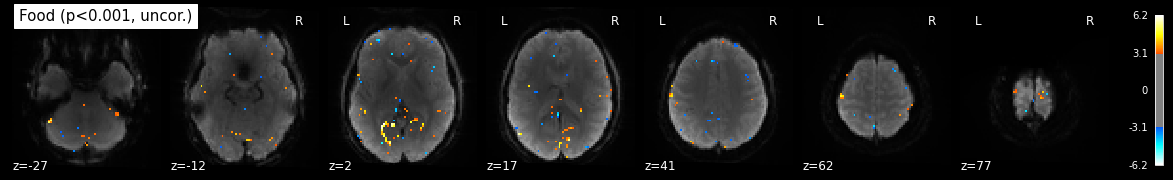

  Cluster ID          X          Y     Z  Peak Stat Cluster Size (mm3)
0          1 -23.245999 -56.719999   2.5   6.244164               1205
1         1a -23.245999 -71.875999   5.5   6.043814                   
2         1b -13.141999 -56.719999   2.5   5.781718                   
3         1c -15.667999 -81.980000   2.5   5.605174                   
4          2  22.222001 -61.771999   5.5   5.821431                842
5         2a  22.222001 -71.875999   5.5   5.420353                   
6         2b  14.644001 -64.297999  11.5   4.444080                   
7          3  -0.511999 -79.454000  11.5   5.727233                382
8         3a   2.014001 -87.032000  26.5   3.683493                   


/opt/conda/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:696: UserWarning: One contrast given, assuming it for all 6 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)


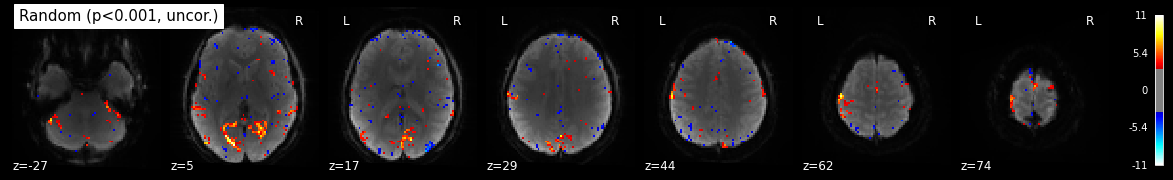

   Cluster ID          X          Y     Z  Peak Stat Cluster Size (mm3)
0           1 -23.245999 -56.719999   2.5  10.733603               8594
1          1a -13.141999 -84.506000   5.5  10.562680                   
2          1b -23.245999 -71.875999   5.5   9.766916                   
3          1c  12.118001 -76.927999  17.5   8.719814                   
4           2 -45.980000 -18.829999  62.5   9.271827               1569
5          2a -38.401999 -21.355999  68.5   8.091839                   
6          2b -30.823999 -23.881999  74.5   6.463672                   
7          2c -30.823999 -33.985999  74.5   4.638752                   
8           3 -61.136000 -18.829999  44.5   8.361240               1167
9          3a -68.714000 -16.303999  29.5   6.675551                   
10         3b -61.136000  -6.199999  41.5   5.370652                   
11          4 -51.032000 -71.875999  11.5   7.760338                880
12         4a -51.032000 -74.401999  26.5   4.987730            

/opt/conda/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:696: UserWarning: One contrast given, assuming it for all 6 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)


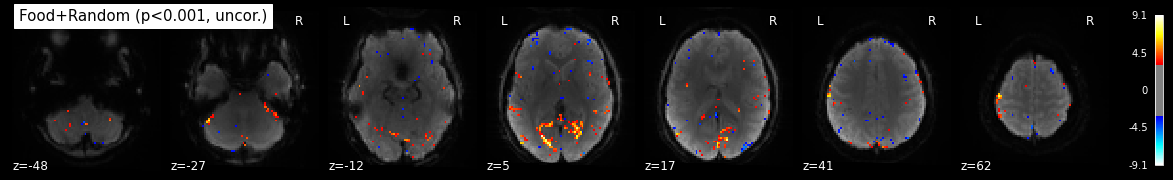

   Cluster ID          X          Y     Z  Peak Stat Cluster Size (mm3)
0           1 -23.245999 -56.719999   2.5   9.057550               2584
1          1a -23.245999 -71.875999   5.5   8.506254                   
2          1b -13.141999 -84.506000   5.5   8.292885                   
3          1c -13.141999 -56.719999   2.5   7.551316                   
4           2  22.222001 -61.771999   5.5   7.723301               4479
5          2a  12.118001 -76.927999  17.5   7.664020                   
6          2b  22.222001 -71.875999   5.5   7.135109                   
7          2c  -0.511999 -81.980000  17.5   6.761244                   
8           3 -45.980000 -18.829999  62.5   7.305478                880
9          3a -33.349999 -18.829999  71.5   5.079838                   
10         3b -45.980000 -11.251999  56.5   5.012751                   
11         3c -48.506000 -26.407999  62.5   4.541058                   
12          4 -51.032000 -71.875999   8.5   6.716517            

/opt/conda/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:696: UserWarning: One contrast given, assuming it for all 6 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)


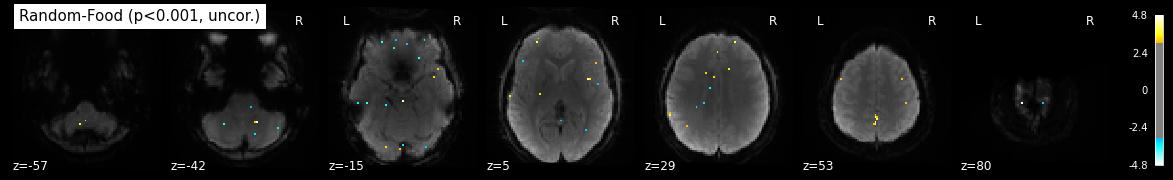

Empty DataFrame
Columns: [Cluster ID, X, Y, Z, Peak Stat, Cluster Size (mm3)]
Index: []
Finishing cell: 18:18:32


/opt/conda/lib/python3.9/site-packages/nilearn/reporting/_get_clusters_table.py:311: UserWarning: Attention: No clusters with stat higher than 3.090232306167813
  warnings.warn(


In [106]:
from nilearn.plotting import plot_stat_map
from nilearn.reporting import get_clusters_table
from nilearn.image import mean_img


# Make a mean image for display purposes
mean_img_ = mean_img(imgs1)

for contrast in contrasts:
    z_map = model1.compute_contrast(contrast, output_type='z_score')


    titlex=''.join([contrast, ' ', '(p<0.001, uncor.)'])
    plot_stat_map(z_map, bg_img=mean_img_, threshold=p001_unc,
              display_mode='z',  black_bg=True,
              title=titlex)
    plt.savefig(f'/work/MR Tutorial - Kathrine/MR_tutorials/z_map_contrast_{contrast}.png')
    plt.show()
    
    # Make a table of cluster coordinates.
    table = get_clusters_table(z_map, stat_threshold=p001_unc,
                           cluster_threshold=20)
    print(table)
    
now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Make the GLM report

In [107]:
from nilearn.reporting import make_glm_report
#Generate a report
report = make_glm_report(model1,
                         contrasts=contrasts,
                         threshold=p001_unc,
                         bg_img=mean_img_,
                         )
#Display report in HTML format
report.save_as_html('/work/MR Tutorial - Kathrine/MR_tutorials/glm.html')
report

/opt/conda/lib/python3.9/site-packages/nilearn/reporting/utils.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.savefig(
/opt/conda/lib/python3.9/site-packages/nilearn/reporting/utils.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.savefig(
/opt/conda/lib/python3.9/site-packages/nilearn/reporting/utils.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.savefig(
/opt/conda/lib/python3.9/site-packages/nilearn/reporting/utils.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.savefig(
/opt/conda/lib/python3.9/site-packages/nilearn/reporting/utils.py:8: UserWarning: Tight layout not applied. The bottom and top margins canno

Make the f contrast

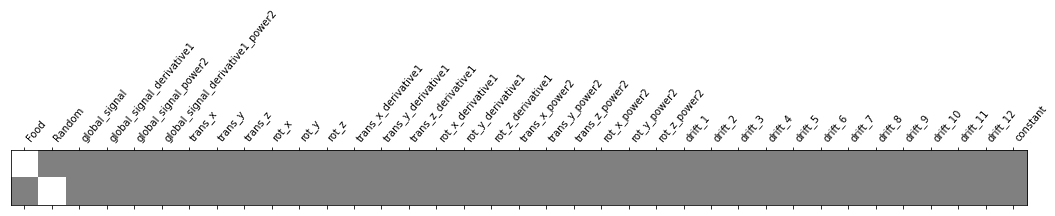

/opt/conda/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:696: UserWarning: One contrast given, assuming it for all 6 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)
/opt/conda/lib/python3.9/site-packages/nilearn/glm/contrasts.py:353: UserWarning: Running approximate fixed effects on F statistics.
  warn('Running approximate fixed effects on F statistics.')


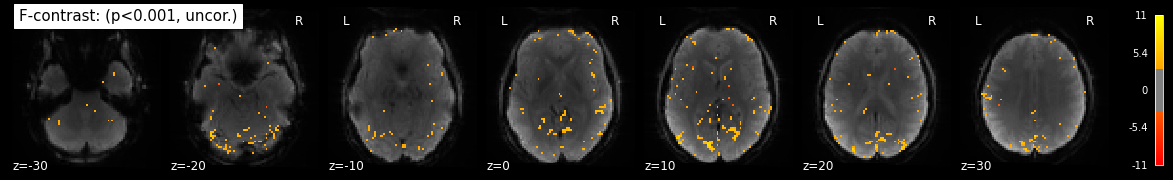

   Cluster ID          X          Y     Z  Peak Stat Cluster Size (mm3)
0           1 -23.245999 -56.719999   2.5  10.703073               2029
1          1a -13.141999 -84.506000   5.5  10.169553                   
2          1b -23.245999 -71.875999   5.5   9.731469                   
3          1c -18.193999 -79.454000   5.5   9.551033                   
4           2 -45.980000 -18.829999  62.5   9.119961               1244
5          2a -38.401999 -21.355999  68.5   7.753357                   
6          2b -30.823999 -23.881999  74.5   6.089661                   
7          2c -51.032000  -6.199999  53.5   3.851497                   
8           3  12.118001 -76.927999  17.5   8.627764               4517
9          3a  22.222001 -61.771999   5.5   8.254538                   
10         3b  14.644001 -71.875999  14.5   8.195304                   
11         3c   2.014001 -71.875999  29.5   7.899628                   
12          4 -61.136000 -18.829999  44.5   7.958021            

In [108]:
import numpy as np

#create a contrast matrix for the F-contrast, spanning the two first columns in the design matrix
effects_of_interest =np.identity(design_matrix.shape[1])[[0,1],:]

#Let's see what it looks like
plot_contrast_matrix(effects_of_interest, design_matrix)
plt.show()

#Similar to above, we will compute the effect
z_map = model1.compute_contrast(effects_of_interest,
                                  output_type='z_score')

#And plot the results using an overlay
plot_stat_map(z_map, bg_img=mean_img_, threshold=p001_unc, cmap='autumn',
              display_mode='z',  black_bg=True,cut_coords=[-30,-20,-10,0,10,20,30],
              title='F-contrast: (p<0.001, uncor.)')
plt.savefig('/work/MR Tutorial - Kathrine/MR_tutorials/F_contrast_single_participant_unc.png')
plt.show()
    
# Make a table of cluster coordinates.
table = get_clusters_table(z_map, stat_threshold=p001_unc,
                           cluster_threshold=20)
print(table)

#### Group level analysis

Starting cell: 18:20:04


Computing run 1 out of 6 runs (go take a coffee, a big one)
Computing run 2 out of 6 runs (83 seconds remaining)
Computing run 3 out of 6 runs (66 seconds remaining)
Computing run 4 out of 6 runs (50 seconds remaining)
/opt/conda/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:64: UserWarning: Mean values of 0 observed.The data have probably been centered.Scaling might not work as expected
  warn('Mean values of 0 observed.'
Computing run 5 out of 6 runs (32 seconds remaining)
Computing run 6 out of 6 runs (16 seconds remaining)

Computation of 6 runs done in 97 seconds

/opt/conda/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:696: UserWarning: One contrast given, assuming it for all 6 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)
Computing run 1 out of 6 runs (go take a coffee, a big one)
Computing run 2 out of 6 runs (81 seconds remaining)
/opt/conda/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:64

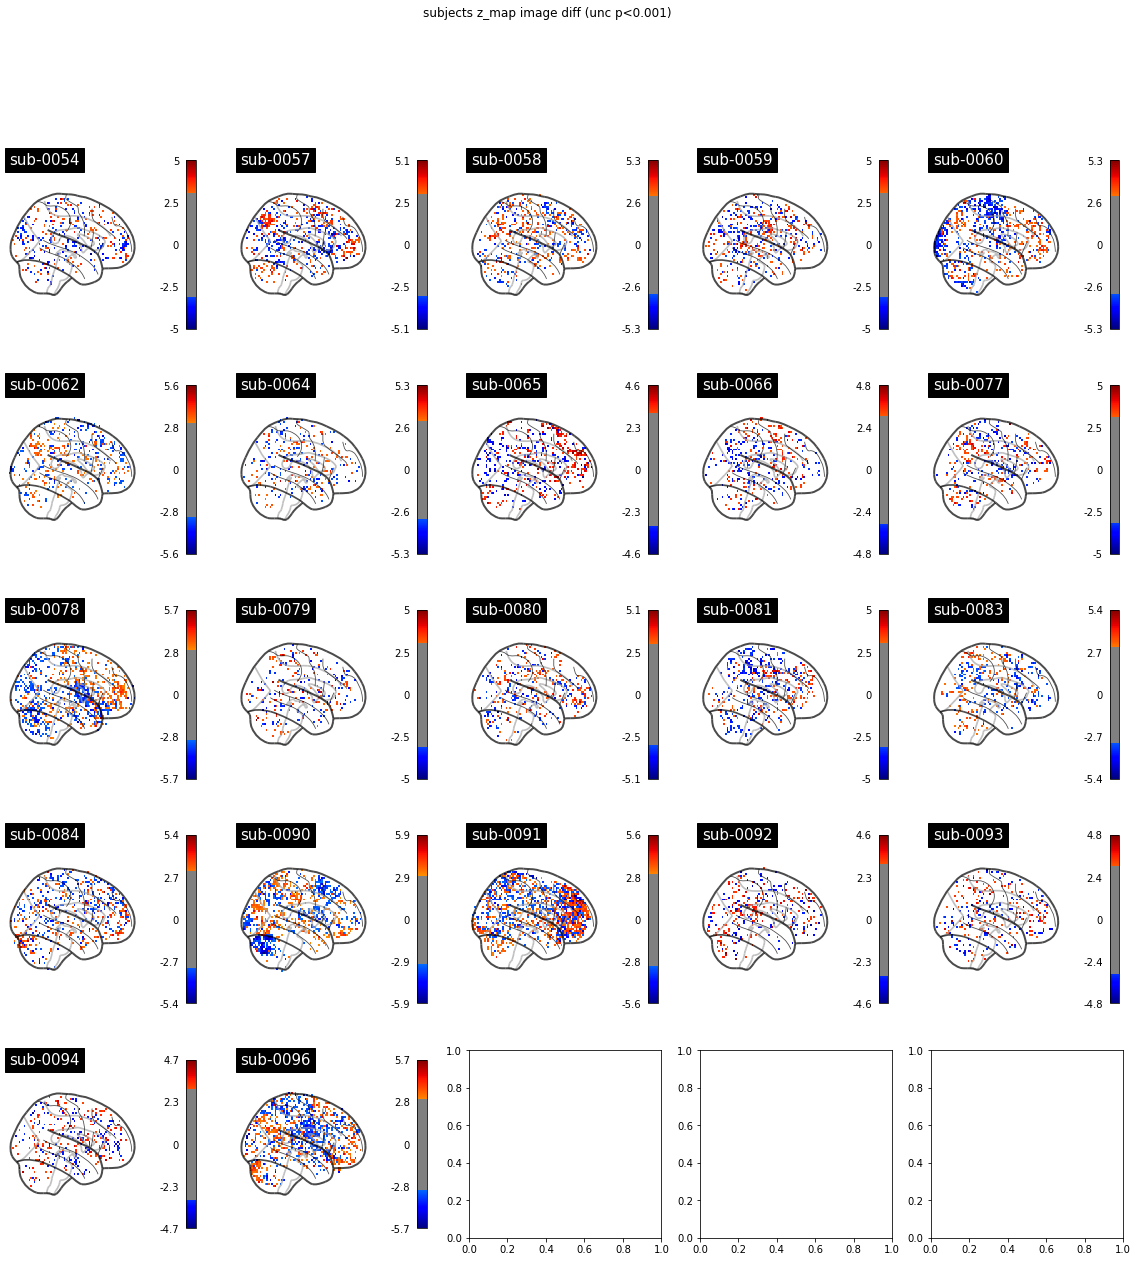

Finishing cell: 18:59:45


In [109]:
#### Analysing all participants in one go

from nilearn import plotting
import matplotlib.pyplot as plt

now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20)) 
model_and_args = zip(models, models_run_imgs, models_events, models_confounds)
for m_idx, (model, imgs, events, confounds) in enumerate(model_and_args):
    # fit the GLM, recall that the model variable is a FirstLevelModel object
    model.fit(imgs, events, confounds)
    # compute the contrast of interest and make a map of z-values
    model.zmap = model.compute_contrast('Random-Food')
    #Plot each thresholded analysis
    plotting.plot_glass_brain(model.zmap, cmap='jet',colorbar=True, threshold=p001_unc,
                              title=('sub-' + model.subject_label),
                              axes=axes[int(m_idx / 5), int(m_idx % 5)],
                              plot_abs=False, display_mode='x')

   
fig.suptitle('subjects z_map image diff (unc p<0.001)')
plt.savefig('/work/MR Tutorial - Kathrine/MR_tutorials/all_subjects_z_map_food_random_unc.png')
plotting.show()

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

In [110]:
import pickle

#Save the first level models
# Saving the objects:
f = open('/work/MR Tutorial - Kathrine/WordFace_first_level_models_food_random.pkl', 'wb')
pickle.dump([models, models_run_imgs, models_events, models_confounds], f)
f.close()

# Getting back the objects:
f = open('/work/MR Tutorial - Kathrine/WordFace_first_level_models_food_random.pkl', 'rb')
models, models_run_imgs, models_events, models_confounds = pickle.load(f)
f.close()

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Finishing cell: 18:59:54


Group level analysis

In [111]:
from nilearn.glm.second_level import SecondLevelModel
#We will simply add the models estimated above to the second level

#second_level_input = models

#NB idx11 has different resolution for some reason
second_level_input = models[0:11]+models[12:]

#Adding the smoothing parameter
second_level_model = SecondLevelModel(smoothing_fwhm=8.0)
second_level_model = second_level_model.fit(second_level_input)

print(second_level_model)

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

/opt/conda/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:696: UserWarning: One contrast given, assuming it for all 6 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)


SecondLevelModel(smoothing_fwhm=8.0)
Finishing cell: 18:59:57


In [112]:
# NB, variable names used in contrasts have to be the same as those in events file.
zmap_g = second_level_model.compute_contrast(
    first_level_contrast='Random-Food')

/opt/conda/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:696: UserWarning: One contrast given, assuming it for all 6 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)
/opt/conda/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:696: UserWarning: One contrast given, assuming it for all 6 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)
/opt/conda/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:696: UserWarning: One contrast given, assuming it for all 6 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)
/opt/conda/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:696: UserWarning: One contrast given, assuming it for all 6 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)
/opt/conda/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:696: UserWarning: One contrast given, assuming it for all 6 runs
  warn('One contr

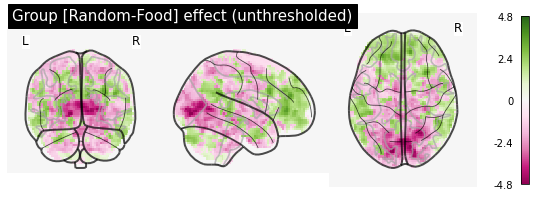

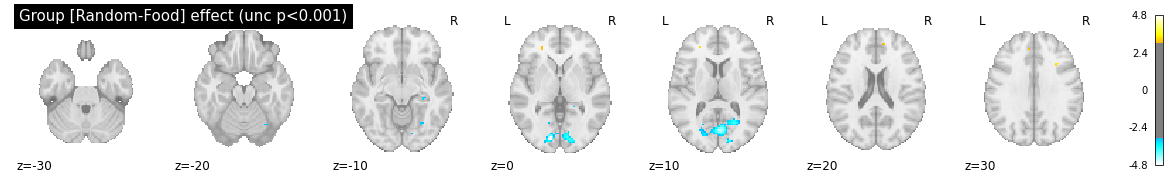

Finishing cell: 19:00:56


In [113]:
# Group level contrasts
from nilearn.plotting import plot_stat_map
import matplotlib

plotting.plot_glass_brain(zmap_g, cmap='PiYG',colorbar=True, threshold=None,
                          title='Group [Random-Food] effect (unthresholded)',
                          plot_abs=False)
plt.savefig('/work/MR Tutorial - Kathrine/MR_tutorials/group_random_food_unc_rota.png')
plt.show()


plot_stat_map(zmap_g, cmap='cold_hot',threshold=p001_unc, cut_coords=[-30,-20,-10,0,10,20,30],
              display_mode='z',  black_bg=False,
              title='Group [Random-Food] effect (unc p<0.001)')
plt.savefig('/work/MR Tutorial - Kathrine/MR_tutorials/group_random_food_unc.png')
plt.show()

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

/opt/conda/lib/python3.9/site-packages/nilearn/_utils/param_validation.py:72: UserWarning: The given float value must not exceed 4.831390542958045. But, you have given threshold=5.004171237798405 
  warnings.warn("The given float value must not exceed {0}. "


The p<.05 FWER-corrected threshold is 5


/opt/conda/lib/python3.9/site-packages/nilearn/plotting/displays/_slicers.py:382: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


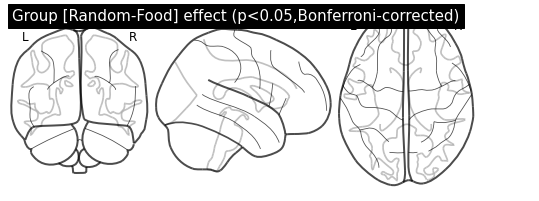

Empty DataFrame
Columns: [Cluster ID, X, Y, Z, Peak Stat, Cluster Size (mm3)]
Index: []


/opt/conda/lib/python3.9/site-packages/nilearn/reporting/_get_clusters_table.py:311: UserWarning: Attention: No clusters with stat higher than 5.004171237798405
  warnings.warn(


In [114]:
# thresholded
from nilearn.glm import threshold_stats_img

thresholded_map, threshold = threshold_stats_img(
    zmap_g, alpha=0.05, height_control='bonferroni')
print('The p<.05 FWER-corrected threshold is %.3g' % threshold)

plotting.plot_glass_brain(zmap_g, cmap='PiYG',colorbar=True, threshold=threshold,
                          title='Group [Random-Food] effect (p<0.05,Bonferroni-corrected)',
                          plot_abs=False)
plt.savefig('/work/MR Tutorial - Kathrine/MR_tutorials/group_random_food_bonf_cor.png')
plt.show()

# Make a table of cluster coordinates.
table = get_clusters_table(zmap_g, stat_threshold=threshold)
print(table)

Look up peak points in atlas

In [115]:
from atlasreader import create_output
create_output(zmap_g, voxel_thresh=threshold, cluster_extent=0,direction='both')
#Atlasreader automatically saves results to both .png-files and a csv-file. Look in your working directory.
pd.read_csv('atlasreader_peaks.csv')

/opt/conda/lib/python3.9/site-packages/nilearn/plotting/displays/_slicers.py:382: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


cluster_id  peak_x  peak_y  peak_z  peak_value  volume_mm  \
0           1  27.274 -89.558    -9.5     5.49975   574.2610   
1           2 -25.772 -94.610    -6.5     5.26584    95.7101   
2           3 -23.246  16.534    35.5    -5.14248    19.1420   
3           4  24.748 -97.136    -3.5     5.06122    19.1420   
4           5 -53.558  36.742    -0.5     5.07913    19.1420   

                 aal             desikan_killiany  \
0    Occipital_Inf_R  Right-Cerebral-White-Matter   
1    Occipital_Inf_L   Left-Cerebral-White-Matter   
2           no_label   Left-Cerebral-White-Matter   
3    Occipital_Inf_R  Right-Cerebral-White-Matter   
4  Frontal_Inf_Tri_L                      Unknown   

                                      harvard_oxford  
0  25.0% Right_Occipital_Pole; 21.0% Right_Occipi...  
1  51.0% Left_Occipital_Pole; 7.0% Left_Lateral_O...  
2                                        0% no_label  
3                         60.0% Right_Occipital_Pole  
4  34.0% Left_Frontal_Pole; 28.0% Left_Inferior_F...

Making an image for comparison

In [116]:
import numpy as np
from nilearn.image import get_data, math_img

#Get an image of p-values
p_val = second_level_model.compute_contrast(first_level_contrast='Random-Food',output_type='p_value')
# Get the number of voxels in the image
n_voxels = np.sum(get_data(second_level_model.masker_.mask_img_))
# Making an image with significant values, correcting the p-values for multiple testing and taking negative logarithm
neg_log_pval = math_img(
    '-np.log10(np.minimum(1, img * {}))'.format(str(n_voxels)),
    img=p_val,
)

#Check image shape
print(neg_log_pval.shape)

/opt/conda/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:696: UserWarning: One contrast given, assuming it for all 6 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)
/opt/conda/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:696: UserWarning: One contrast given, assuming it for all 6 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)
/opt/conda/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:696: UserWarning: One contrast given, assuming it for all 6 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)
/opt/conda/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:696: UserWarning: One contrast given, assuming it for all 6 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)
/opt/conda/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:696: UserWarning: One contrast given, assuming it for all 6 runs
  warn('One contr

(78, 92, 65)


<string>:1: RuntimeWarning: divide by zero encountered in log10


Performing permutations

In [117]:
import numpy as np
from nilearn.image import get_data, math_img
from nilearn.glm.second_level import non_parametric_inference

now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))

# n_perm=1000 for the sake of time. Ideally, this should be 10,000, but the upper limit on permutations is 2 to the power of N.
n_perm=10000

#We base the analysis on a contrast image (z-score map) from each participant
second_level_input2=[]
#Put the NIimg zmaps into a list.
for ii in range(21):
    second_level_input2.append(second_level_input[ii].zmap)

design_matrix = pd.DataFrame(
    [1] * len(second_level_input2),
    columns=['intercept'],
)
print(design_matrix)

#Calculate p-values using permutation
out_dict = non_parametric_inference(
    second_level_input2,
    design_matrix=design_matrix,
    model_intercept=True,
    n_perm=n_perm,  
    two_sided_test=False,
    smoothing_fwhm=8.0,
    n_jobs=1,
        
    
)

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Starting cell: 19:01:57
    intercept
0           1
1           1
2           1
3           1
4           1
5           1
6           1
7           1
8           1
9           1
10          1
11          1
12          1
13          1
14          1
15          1
16          1
17          1
18          1
19          1
20          1
Finishing cell: 19:04:06


/opt/conda/lib/python3.9/site-packages/nilearn/_utils/niimg.py:63: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(
/opt/conda/lib/python3.9/site-packages/nilearn/plotting/displays/_slicers.py:382: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


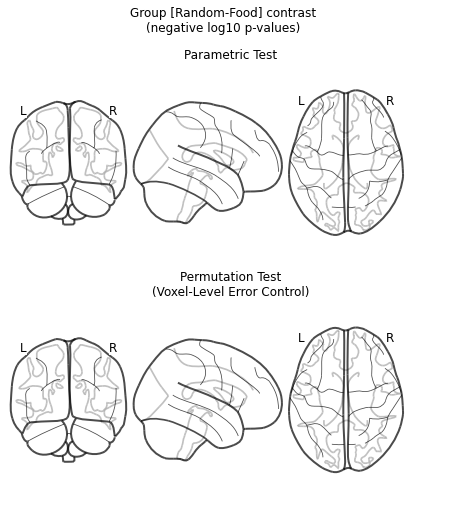

In [118]:
# Prepare thresholds for plotting
threshold_log = round(-np.log10(1 / 20))  # p < 0.05 
vmax = round(-np.log10(1 / n_perm)) # minimal p-value possible with the number of permuations

cut_coords = [0]

#Prepare images to plot
IMAGES = [
    neg_log_pval,
    out_dict
]
TITLES = [
    'Parametric Test',
    'Permutation Test\n(Voxel-Level Error Control)',
]

#Make loop with plots
fig, axes = plt.subplots(figsize=(8, 8), nrows=2, ncols=1)
img_counter = 0
i_row=0
for j_row in range(2):
        ax = axes[j_row]     
        plotting.plot_glass_brain(
            IMAGES[img_counter],
            colorbar=True,
            vmax=vmax,
            plot_abs=False,
            cut_coords=cut_coords,
            threshold=threshold_log,
            figure=fig,
            axes=ax,
        )

        
        ax.set_title(TITLES[img_counter])
        img_counter += 1


fig.suptitle('Group [Random-Food] contrast\n(negative log10 p-values)')
plt.savefig('/work/MR Tutorial - Kathrine/MR_tutorials/group_parametric_permutation.png')
plt.show()
